In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [137]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
autistic_spectrum_disorder_screening_data_for_children = fetch_ucirepo(id=419) 
  
# data (as pandas dataframes) 
X = autistic_spectrum_disorder_screening_data_for_children.data.features 
y = autistic_spectrum_disorder_screening_data_for_children.data.targets 
  


In [138]:
df = pd.concat([X, y], axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jaundice         292 non-null    object 
 14  autism           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [140]:
conteo_nulo_columnas = df.isnull().sum()
print(conteo_nulo_columnas)

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
class               0
dtype: int64


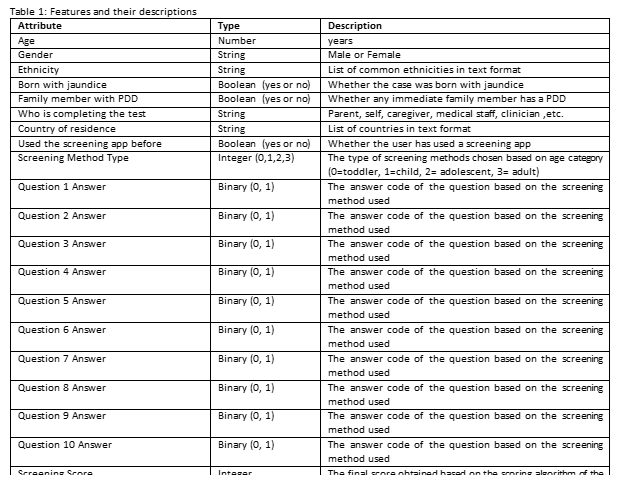
> en esta tabla se puede apreciar que es lo que tiene cada dato, de los cuales podemos influir que el pais donde vive no afecta al estudio de autismo, junto con el parentesco de la persona que contesto la encuesta, además de que tampoco nos interesa quien habia utilizado la app anteriormente.

In [141]:
data = {
    "Etnia": X["ethnicity"],
    "Autismo": y["class"]
}
cdf = pd.DataFrame(data)

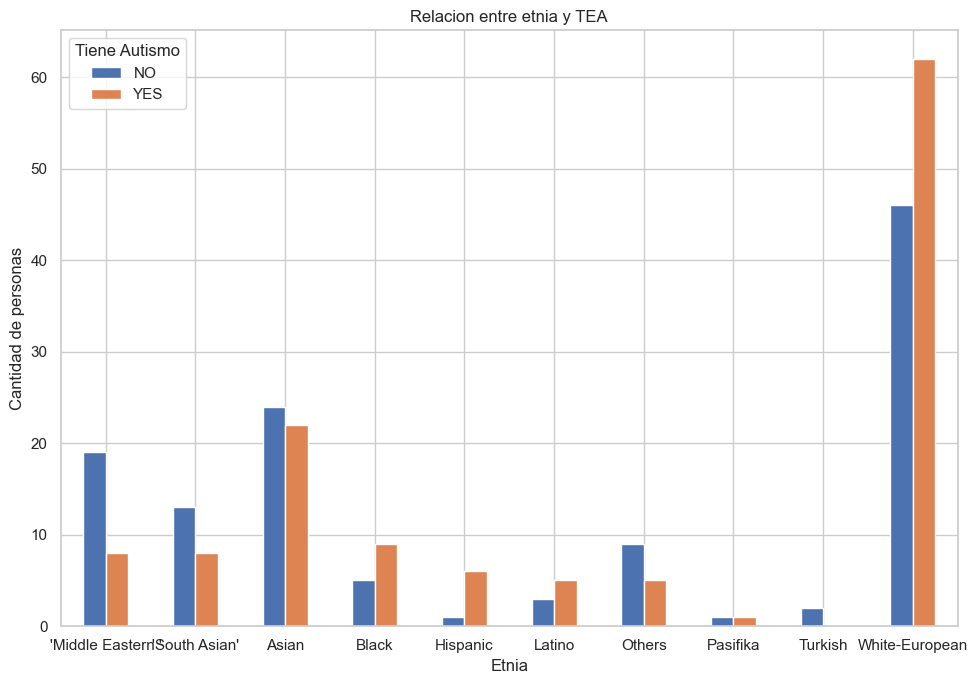

In [142]:
conteo_datos = pd.crosstab(cdf["Etnia"],cdf["Autismo"])
conteo_datos.plot(kind="bar",figsize=(10,7))
plt.title("Relacion entre etnia y TEA")
plt.xlabel("Etnia")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.legend(title='Tiene Autismo')
plt.tight_layout()
plt.show()

In [143]:
# 3. Realizar la Prueba de Chi-cuadrado
# chi2_contingency devuelve 4 valores, pero los más importantes son los dos primeros.
chi2_stat, p_value, dof, expected = chi2_contingency(conteo_datos)

print(f"Estadístico Chi-cuadrado (χ²): {chi2_stat:.4f}")
print(f"P-valor: {p_value:.4f}")


Estadístico Chi-cuadrado (χ²): 16.4527
P-valor: 0.0580


>Usaremos un nivel de significancia del **0.05**
>
> Hipotesis nula (H0): "No hay una asociación entre la etnia y el autismo"
>
> Hipotesis alternativa(H1): "Si hay una asociación entre la etnia y el autismo"

> el valor-p es 0.0580 el cual es mayor que nuestro nivel de significancia, por ende no podemos rechazar la hipotesis nula, lo que nos quiere decir que: **No hay evidencia suficiente para decir que existe una asociación entre la etnia y tener autismo en estos datos**

> gracias a los graficos y al estadistico chi-cuadrado tenemos suficiente información para decir que en este caso no vamos a tomar en cuenta la etnia para hacer la predicción de los datos, ya que no afecta la etnia por lo que podemos apreciar

In [144]:
datos_analizar = df.drop(columns=["ethnicity","relation","country_of_res","used_app_before"])
datos_analizar.dropna(inplace=True)
datos_analizar.reset_index(drop=True, inplace=True)


In [145]:
datos_analizar.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,result,age_desc,class
0,1,1,0,0,1,1,0,1,0,0,6.0,m,no,no,5,'4-11 years',NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,no,no,5,'4-11 years',NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,no,no,5,'4-11 years',NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,yes,no,4,'4-11 years',NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,yes,no,10,'4-11 years',YES


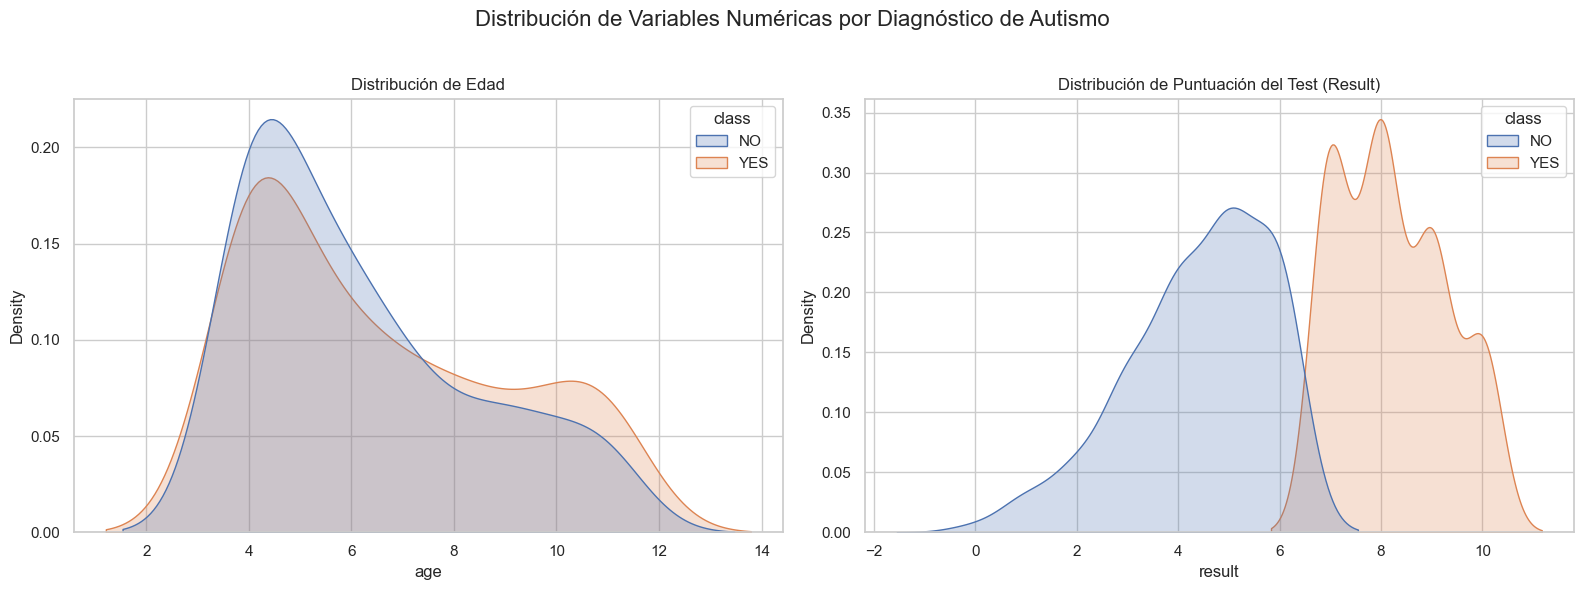

In [146]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución de Variables Numéricas por Diagnóstico de Autismo', fontsize=16)
sns.kdeplot(data=datos_analizar, x='age', hue='class', fill=True, common_norm=False, ax=axes[0])
axes[0].set_title('Distribución de Edad')
sns.kdeplot(data=datos_analizar, x='result', hue='class', fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('Distribución de Puntuación del Test (Result)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Edad: Las curvas de densidad para 'YES' y 'NO' se superponen bastante. Esto sugiere que la edad, por sí sola, podría no ser un predictor muy fuerte

 Puntuación: **Aquí la diferencia es enorme, La curva para 'YES' se concentra en valores altos (6-10), mientras que la de 'NO' se concentra en valores bajos (0-5). Esta variable es extremadamente importante y predictiva**

Para calcular la correlación, primero convertimos la variable objetivo ASD a números (YES=1, NO=0)

In [147]:
# Copiamos el dataframe para no modificar el original
df_corr = datos_analizar.copy()
df_corr['class_numeric'] = df_corr['class'].apply(lambda x: 1 if x == 'YES' else 0)

In [148]:
# Calculamos la correlación de Pearson solo para las variables numéricas
correlation = df_corr[['age', 'result', 'class_numeric']].corr()['class_numeric']

# Correlación de Pearson con el Diagnóstico de Autismo

In [160]:
print(correlation.sort_values(ascending=False))

class_numeric    1.000000
result           0.839258
age              0.075835
Name: class_numeric, dtype: float64


**result (0.84): Una correlación positiva muy fuerte. Confirma lo que vimos en el gráfico: a mayor puntuación, mayor probabilidad de tener diagnóstico de autismo. Es la variable predictora más fuerte**

age (0.08): Una correlación positiva muy débil. Confirma que la edad tiene poca relación lineal con el diagnóstico.

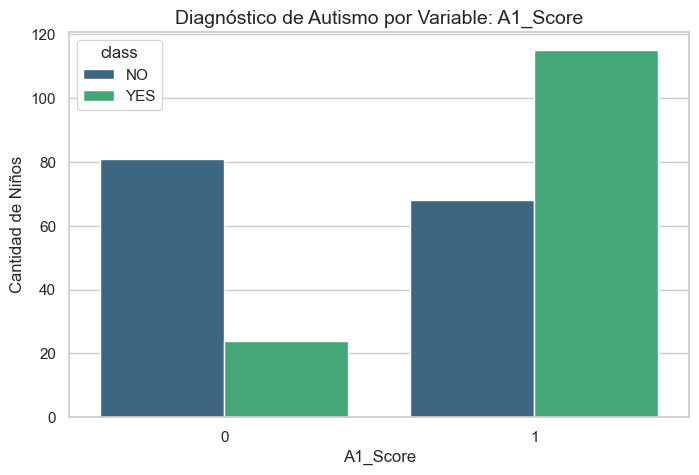

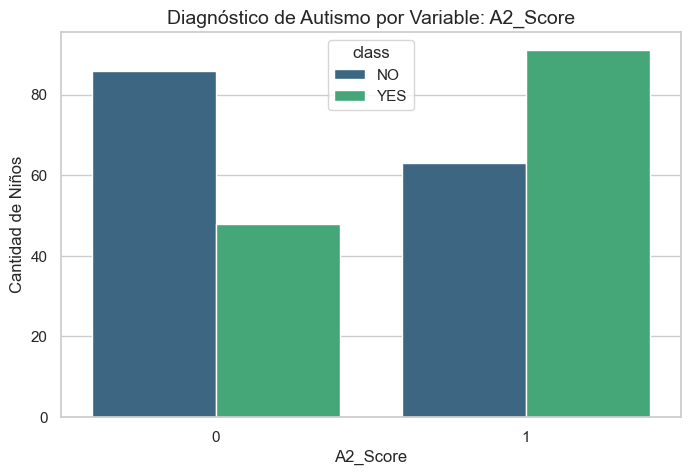

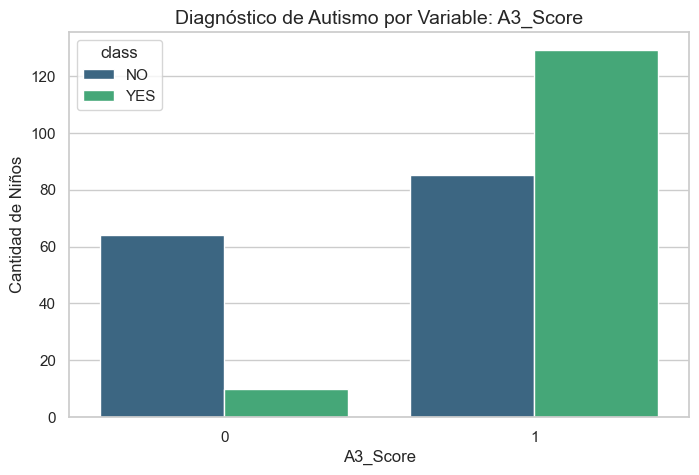

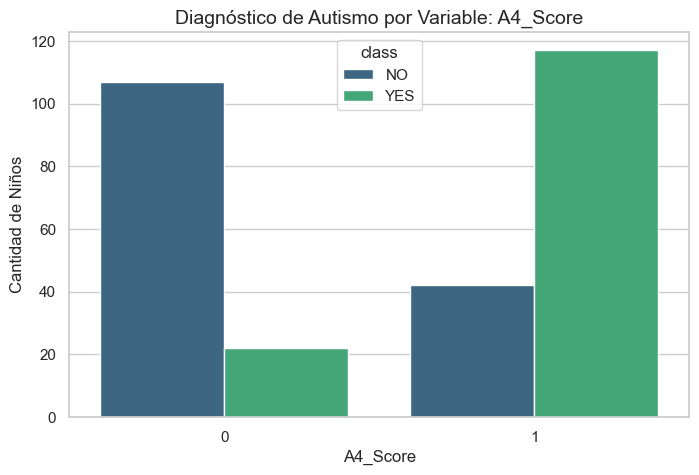

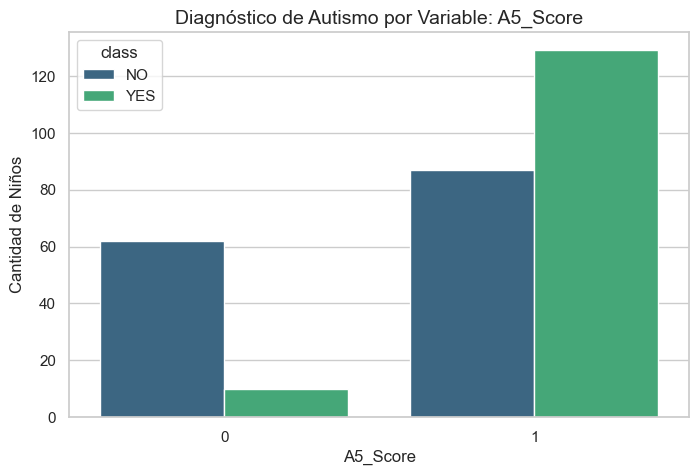

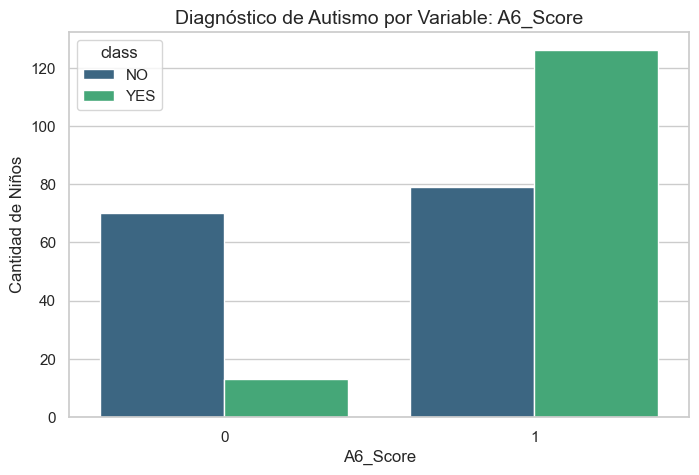

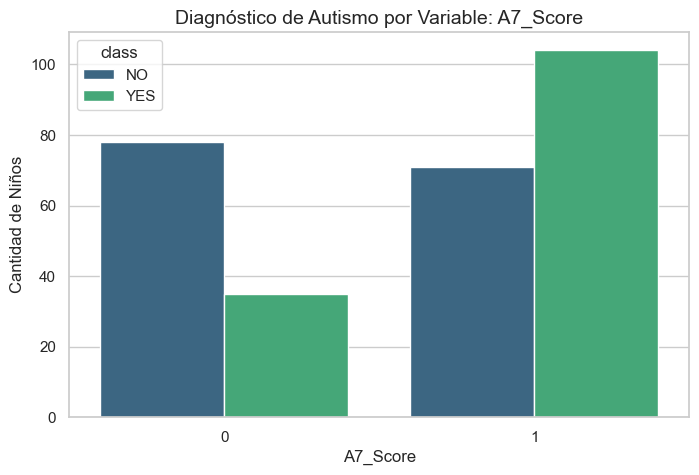

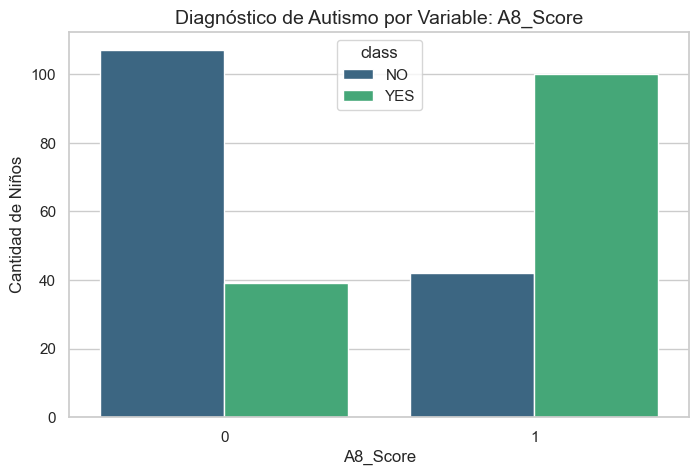

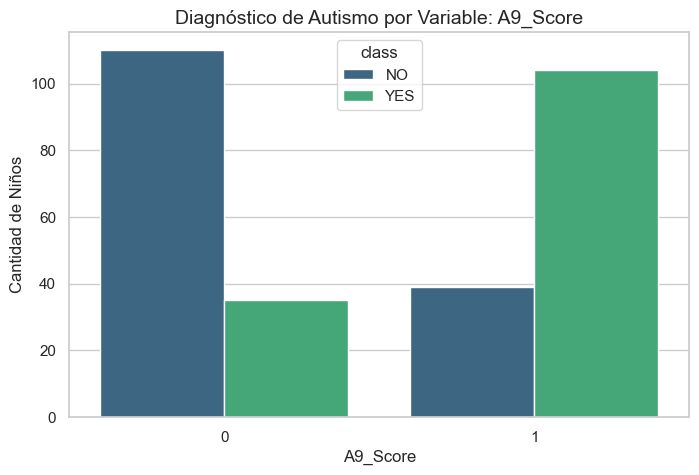

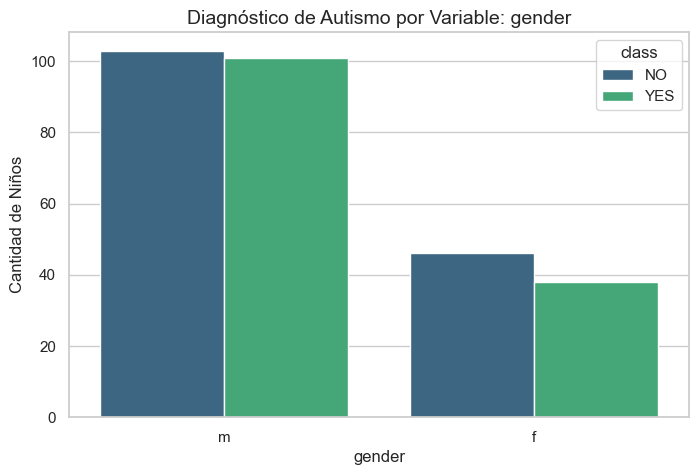

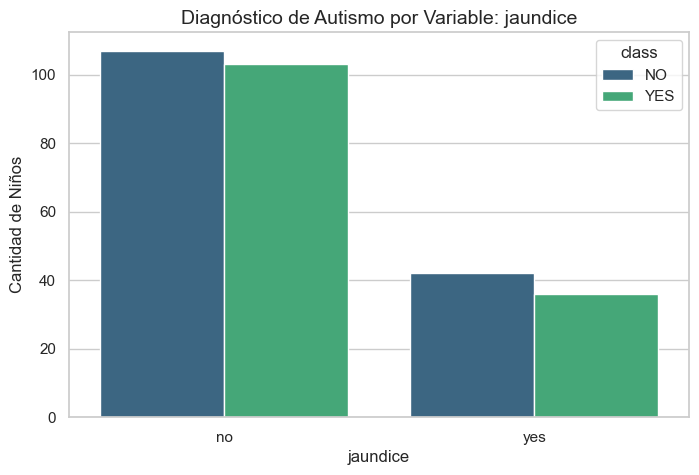

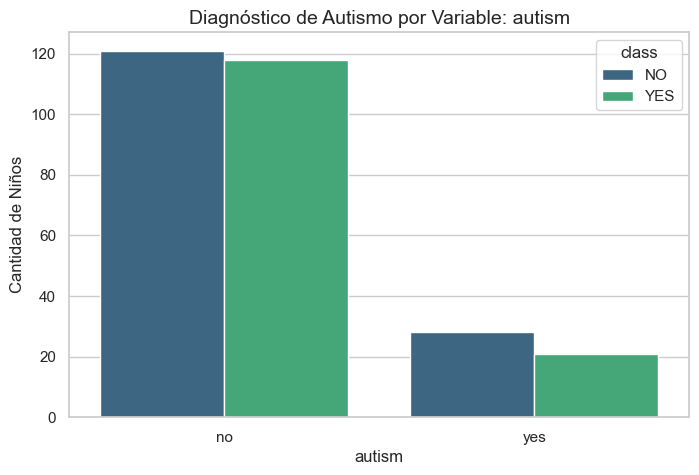

In [161]:
# Seleccionamos algunas variables categóricas clave para visualizar
# No las graficamos todas para no saturar, pero el principio es el mismo.
cat_vars_to_plot = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score', 'gender', 'jaundice', 'autism']

# Crear gráficos de barras
for var in cat_vars_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='class', data=datos_analizar, palette='viridis')
    plt.title(f'Diagnóstico de Autismo por Variable: {var}', fontsize=14)
    plt.ylabel('Cantidad de Niños')
    plt.show()

In [162]:
def cramers_v(contingency_table):
    """ Calcula la V de Cramer de manera robusta. """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if min_dim == 0:
        return 0
    return np.sqrt(chi2 / (n * min_dim))

In [163]:
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
                    'gender', 'jaundice', 'autism']

La V de Cramer da un valor entre 0 y 1 que mide la fuerza de la asociación. Un valor más alto significa una relación más fuerte y, por lo tanto, la variable es más predictiva.

Se clasifica en:

- V > 0.3: Asociación Fuerte (¡excelente predictor!)
- 0.2 < V < 0.3: Asociación Moderada (buen predictor, vale la pena incluirlo)
- 0.1 < V < 0.2: Asociación Débil (predictor poco fiable, probablemente no muy útil)
- V < 0.1: Asociación Muy Débil o Inexistente (candidato a ser eliminado)

In [164]:
associations = {}
print("--- Fuerza de Asociación (V de Cramer) con el Diagnóstico ---")
for col in categorical_cols:
    contingency_table = pd.crosstab(datos_analizar[col], datos_analizar['class'])
    associations[col] = cramers_v(contingency_table)

# Ordenamos los resultados para ver las variables más asociadas
cramers_results = pd.Series(associations).sort_values(ascending=False)
print(cramers_results)

--- Fuerza de Asociación (V de Cramer) con el Diagnóstico ---
A4_Score     0.555584
A9_Score     0.479226
A8_Score     0.430374
A10_Score    0.424461
A6_Score     0.407463
A3_Score     0.400989
A5_Score     0.389144
A1_Score     0.377914
A7_Score     0.270931
A2_Score     0.225313
autism       0.039746
gender       0.031212
jaundice     0.017917
dtype: float64
